# Self-Reported Patient Symptom Dataset Analysis 

## This notebook also includes Feature Engineering Algorithms


In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xgboost as xgb
import warnings


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

## Model Imports
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Feature Engineering
from sklearn.feature_selection import mutual_info_classif, chi2, SequentialFeatureSelector
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')  

In [2]:
raw_data = pd.read_excel('raw_data/Gitlab/subhabrataoreo_enodmetriosis-detection-model.xlsx')
print("Shape: ", raw_data.shape)
raw_data.head()

Shape:  (886, 59)


,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,0,1,1
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,1,1,0,1,0,0,1
3,1,0,0,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# for importance feature and chi square test
data = pd.read_csv('processed_data/patient_data.csv')
print("Shape: ", data.shape)
data.head()

X = data.drop('endometriosis_yn', axis = 1)
y = data[['endometriosis_yn']]

Xtrain, Xtest ,ytrain ,ytest = train_test_split(X, y, test_size=0.25, random_state=0)

Shape:  (886, 59)


In [4]:
#check for null values 
raw_data.isnull().sum() #there are no missing values

Heavy / Extreme menstrual bleeding                 0
Menstrual pain (Dysmenorrhea)                      0
Painful / Burning pain during sex (Dyspareunia)    0
Pelvic pain                                        0
Irregular / Missed periods                         0
Cramping                                           0
Abdominal pain / pressure                          0
Back pain                                          0
Painful bowel movements                            0
Nausea                                             0
Menstrual clots                                    0
Infertility                                        0
Painful cramps during period                       0
Pain / Chronic pain                                0
Diarrhea                                           0
Long menstruation                                  0
Constipation / Chronic constipation                0
Vomiting / constant vomiting                       0
Fatigue / Chronic fatigue                     

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Heavy / Extreme menstrual bleeding               886 non-null    int64
 1   Menstrual pain (Dysmenorrhea)                    886 non-null    int64
 2   Painful / Burning pain during sex (Dyspareunia)  886 non-null    int64
 3   Pelvic pain                                      886 non-null    int64
 4   Irregular / Missed periods                       886 non-null    int64
 5   Cramping                                         886 non-null    int64
 6   Abdominal pain / pressure                        886 non-null    int64
 7   Back pain                                        886 non-null    int64
 8   Painful bowel movements                          886 non-null    int64
 9   Nausea                                           886 n

In [6]:
raw_data["Endometriosis_YN"].value_counts() #the yes to no ratio is pretty equal

1    474
0    412
Name: Endometriosis_YN, dtype: int64

In [7]:
# prints the summary of the data
raw_data.describe()

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,Endometriosis_YN
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.432280,0.432280,0.413093,0.490971,0.302483,0.547404,0.408578,0.542889,0.295711,0.381490,...,0.172686,0.257336,0.397291,0.343115,0.376975,0.227991,0.297968,0.250564,0.274266,0.534989
std,0.495673,0.495673,0.492667,0.500201,0.459593,0.498029,0.491849,0.498438,0.456619,0.486027,...,0.378189,0.437413,0.489614,0.475018,0.484902,0.419774,0.457624,0.433583,0.446396,0.499056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#checks the amount of yes/no for each featuer
for i in raw_data:
    print(raw_data[i].value_counts() )

0    503
1    383
Name: Heavy / Extreme menstrual bleeding, dtype: int64
0    503
1    383
Name: Menstrual pain (Dysmenorrhea), dtype: int64
0    520
1    366
Name: Painful / Burning pain during sex (Dyspareunia), dtype: int64
0    451
1    435
Name: Pelvic pain, dtype: int64
0    618
1    268
Name: Irregular / Missed periods, dtype: int64
1    485
0    401
Name: Cramping, dtype: int64
0    524
1    362
Name: Abdominal pain / pressure, dtype: int64
1    481
0    405
Name: Back pain, dtype: int64
0    624
1    262
Name: Painful bowel movements, dtype: int64
0    548
1    338
Name: Nausea, dtype: int64
0    648
1    238
Name: Menstrual clots, dtype: int64
0    708
1    178
Name: Infertility, dtype: int64
0    540
1    346
Name: Painful cramps during period, dtype: int64
0    533
1    353
Name: Pain / Chronic pain, dtype: int64
0    607
1    279
Name: Diarrhea, dtype: int64
0    697
1    189
Name: Long menstruation, dtype: int64
0    684
1    202
Name: Constipation / Chronic constipation,

In [9]:
# No of categorical and numerical variables
raw_data.dtypes.value_counts() #all variables are binary (0 or 1)

int64    59
dtype: int64

## Symptom Distribution

In [10]:
# Data Dictionary
data_dict = {
    "Heavy / Extreme menstrual bleeding": [503, 383],
    "Menstrual pain (Dysmenorrhea)": [503, 383],
    "Painful / Burning pain during sex (Dyspareunia)": [520, 366],
    "Pelvic pain": [451, 435],
    "Irregular / Missed periods": [618, 268],
    "Cramping": [401, 485],
    "Abdominal pain / pressure": [524, 362],
    "Back pain": [405, 481],
    "Painful bowel movements": [624, 262],
    "Nausea": [548, 338],
    "Menstrual clots": [648, 238],
    "Infertility": [708, 178],
    "Painful cramps during period": [540, 346],
    "Pain / Chronic pain": [533, 353],
    "Diarrhea": [607, 279],
    "Long menstruation": [697, 189],
    "Constipation / Chronic constipation": [684, 202],
    "Vomiting / Constant vomiting": [722, 164],
    "Fatigue / Chronic fatigue": [508, 378],
    "Painful ovulation": [586, 300],
    "Stomach cramping": [597, 289],
    "Migraines": [548, 338],
    "Extreme / Severe pain": [607, 279],
    "Leg pain": [588, 298],
    "Irritable Bowel Syndrome (IBS)": [718, 168],
    "Syncope (Fainting, passing out)": [815, 71],
    "Mood swings": [552, 334],
    "Depression": [564, 322],
    "Bleeding": [435, 451],
    "Lower back pain": [532, 354],
    "Fertility Issues": [756, 130],
    "Ovarian cysts": [677, 209],
    "Painful urination": [710, 176],
    "Headaches": [551, 335],
    "Constant bleeding": [792, 94],
    "Pain after Intercourse": [643, 243],
    "Digestive / GI problems": [694, 192],
    "IBS-like symptoms": [707, 179],
    "Excessive bleeding": [737, 149],
    "Anaemia / Iron deficiency": [701, 185],
    "Hip pain": [641, 245],
    "Vaginal Pain/Pressure": [653, 233],
    "Sharp / Stabbing pain": [598, 288],
    "Bowel pain": [663, 223],
    "Anxiety": [561, 325],
    "Cysts (unspecified)": [703, 183],
    "Dizziness": [638, 248],
    "Malaise / Sickness": [779, 107],
    "Abnormal uterine bleeding": [809, 77],
    "Fever": [733, 153],
    "Hormonal problems": [658, 228],
    "Bloating": [534, 352],
    "Feeling sick": [582, 304],
    "Decreased energy / Exhaustion": [552, 334],
    "Abdominal Cramps during Intercourse": [684, 202],
    "Insomnia / Sleeplessness": [622, 264],
    "Acne / Pimples": [664, 222],
    "Loss of appetite": [643, 243],
    "Endometriosis_YN (Diagnosis Label)": [412, 474]
}

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['No (0)', 'Yes (1)'])


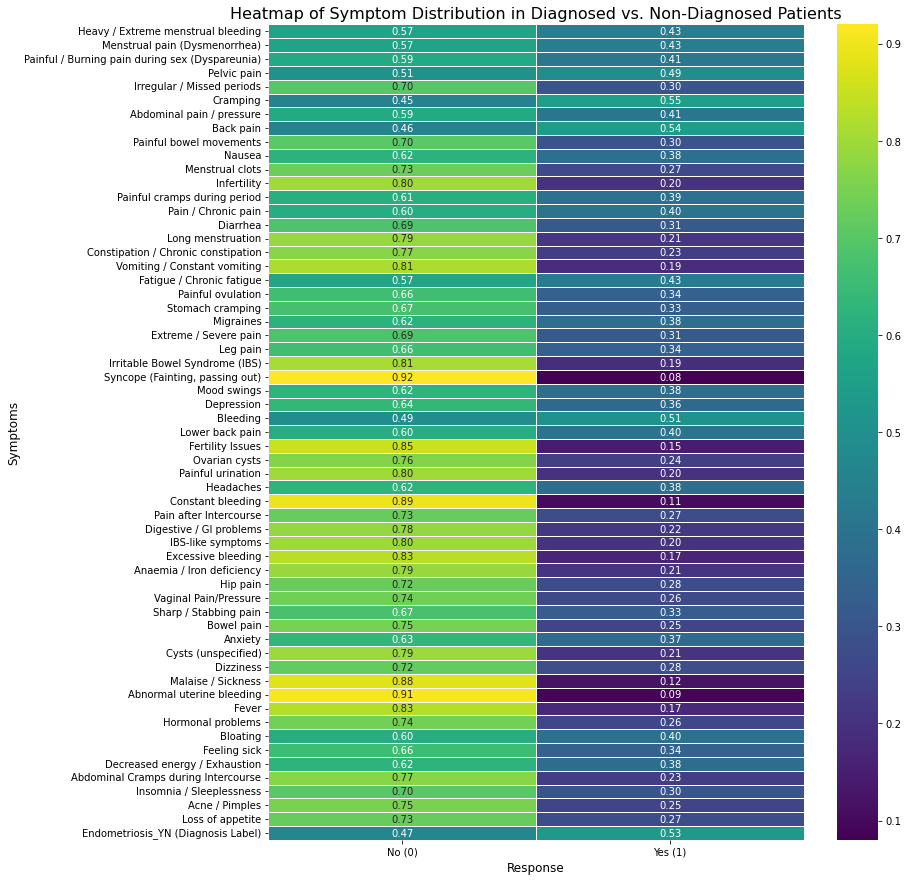

In [11]:
# Normalize data for better visualization
df_normalized = df.div(df.sum(axis=1), axis=0)

# Create Heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(df_normalized, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)

plt.xlabel("Response", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.title("Heatmap of Symptom Distribution in Diagnosed vs. Non-Diagnosed Patients", fontsize=16)

plt.savefig('../images/machine_learning/heatmap.png', dpi=300, bbox_inches='tight')  # Save the heatmap
plt.show()

## Correlation Matrix

In [12]:
#Correlation of variables with Endometriosis
corrMatrix = raw_data.corr()
print(corrMatrix['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

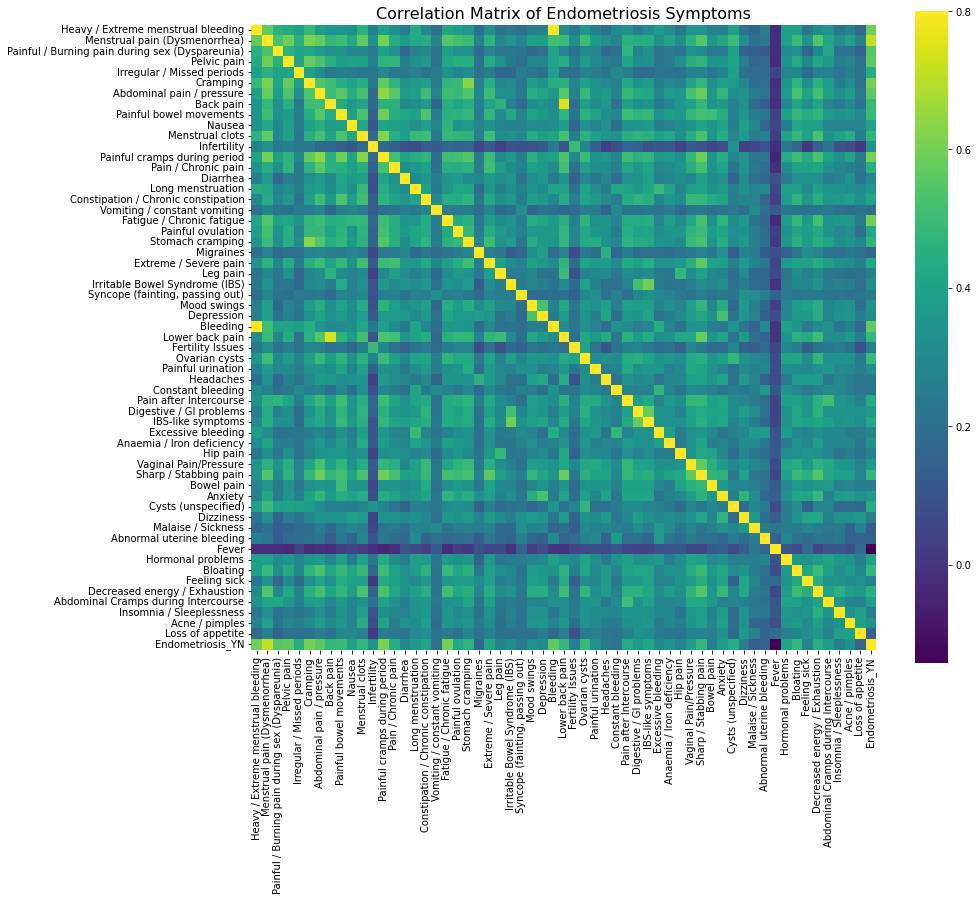

In [13]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation Matrix of Endometriosis Symptoms',y=1,size=16)
sns.heatmap(corrMatrix,square = True, cmap='viridis', vmax=0.8)
plt.savefig('../images/machine_learning/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:

# Selecting features with correlation > 0.45 for the analysis
df1 = raw_data[['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period', 'Cramping', 'Fatigue / Chronic fatigue',
       'Heavy / Extreme menstrual bleeding', 'Bleeding', 'Pelvic pain','Abdominal pain / pressure',
          'Painful / Burning pain during sex (Dyspareunia)','Painful bowel movements', 'Ovarian cysts', 'Back pain', 'Bloating',
         'Lower back pain', 'Sharp / Stabbing pain', 'Menstrual clots', 'Stomach cramping', 'Decreased energy / Exhaustion',
         'Pain / Chronic pain', 'Endometriosis_YN']]
# Correlation plot for the selected features
corrMatrix1 = df1.corr()
print(corrMatrix1['Endometriosis_YN'].sort_values(ascending = False),'\n')

Endometriosis_YN                                   1.000000
Menstrual pain (Dysmenorrhea)                      0.713039
Painful cramps during period                       0.611767
Cramping                                           0.602516
Fatigue / Chronic fatigue                          0.598330
Heavy / Extreme menstrual bleeding                 0.594275
Bleeding                                           0.569073
Pelvic pain                                        0.567080
Abdominal pain / pressure                          0.563149
Painful / Burning pain during sex (Dyspareunia)    0.552379
Painful bowel movements                            0.495025
Ovarian cysts                                      0.491360
Back pain                                          0.489094
Bloating                                           0.484099
Lower back pain                                    0.483313
Sharp / Stabbing pain                              0.482743
Menstrual clots                         

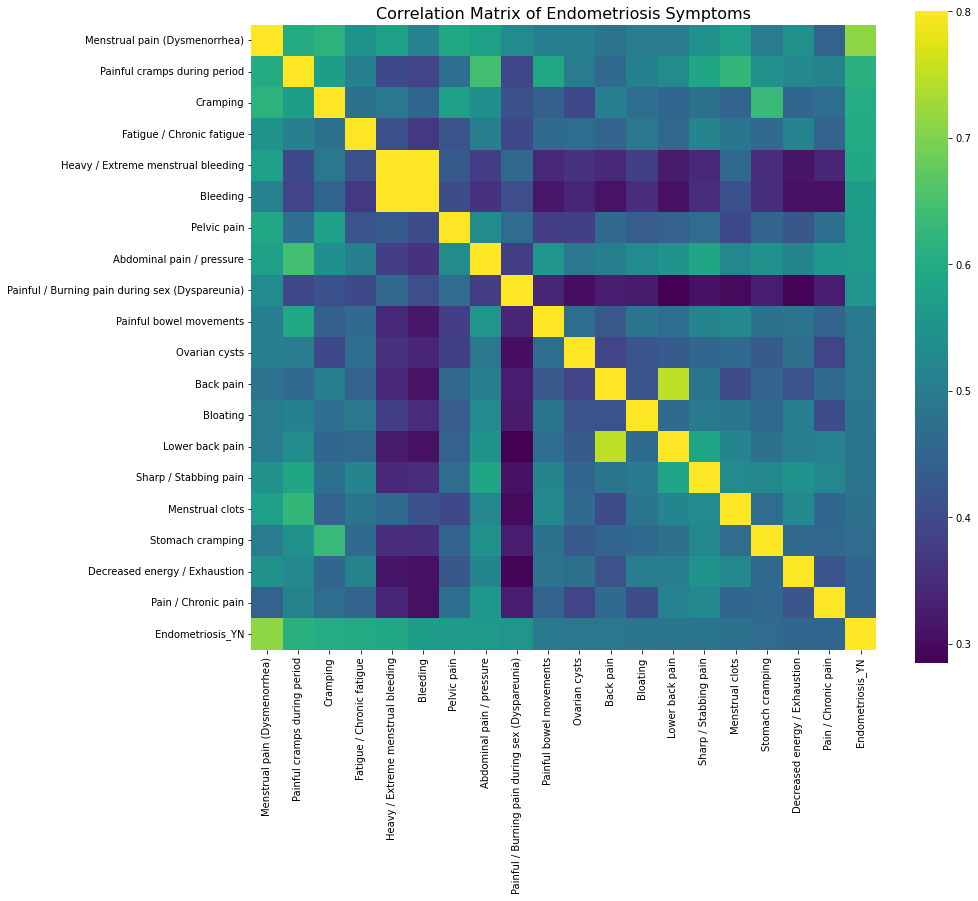

In [15]:
#Correlation plot
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation Matrix of Endometriosis Symptoms',y=1,size=16)

sns.heatmap(corrMatrix1,square = True,  cmap='viridis', vmax=0.8)
plt.savefig('../images/machine_learning/correlation_matrix_2.png', dpi=300, bbox_inches='tight')
plt.show()

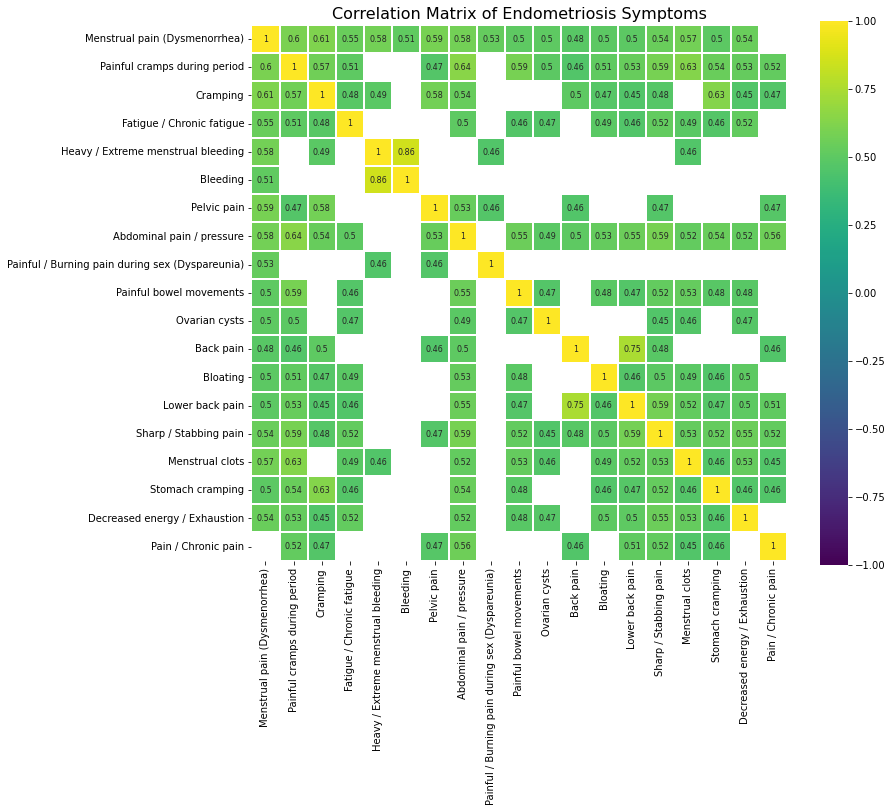

In [16]:
#Correlation plot with corr > 0.45 and < -0.45
corr = df1.drop('Endometriosis_YN', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Endometriosis Symptoms',y=1,size=16)

sns.heatmap(corr[(corr >= 0.45) | (corr <= -0.4)],
                                   cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                                   annot=True, annot_kws={"size": 8}, square=True);

plt.savefig('../images/machine_learning/correlation_matrix_3.png', dpi=300, bbox_inches='tight')

## Chi Square Test

In [17]:
def chi_square_test(Xtrain, ytrain):
    color = (0.3, # redness
         0.5, # greenness
         0.8, # blueness
         0.7 # transparency
         )  
    
    f_score = chi2(Xtrain, ytrain)
    f_score

    p_values = pd.Series(f_score[1], index = Xtrain.columns)
    p_values.sort_values(ascending = False, inplace = True)
    
    # Print p-values for each feature
    print("\nChi-Square Test P-Values:")
    for feature, p_value in p_values.items():
        print(f"{feature}: {p_value:.25f}")
        
    plt.figure(figsize=(24, 16))
    plt.title('Chi-Square Test',y=1,size=16)
    bars = p_values.plot.barh(color = color)
    plt.yticks(fontsize=14)
    plt.xlabel("P-Value", fontsize=14)
    plt.ylabel("Features", fontsize=14)

    
    # Add labels to each bar
    for bar, value in zip(bars.patches, p_values):
        
        if (value > 0.0001):
            plt.text(bar.get_width() + 0.0001,  # X-coordinate (shift slightly to the right)
                     bar.get_y() + bar.get_height()/2,  # Y-coordinate (centered on the bar)
                     f"{value:.4f}",  # Format p-value to 4 decimal places
                     va='center', ha='left', fontsize=14)  # Alignment and font size
    
    plt.savefig('../images/machine_learning/chi_square.png', dpi=300, bbox_inches='tight')
    plt.show()


Chi-Square Test P-Values:
loss_of_appetite: 0.0164577376708738426502876
malaise_or_sickness: 0.0069860405463485824792413
migraines: 0.0051575235744986524383249
abnormal_uterine_bleeding: 0.0004224829698534674046924
fever: 0.0002056224160275591677539
vomiting_or_constant_vomiting: 0.0000126387659334190314328
constant_bleeding: 0.0000026653145481662263671
headaches: 0.0000023429483507625243603
dizziness: 0.0000014896830483023867666
bowel_pain: 0.0000002891325264759730124
feeling_sick: 0.0000002729120535008830958
syncope_(fainting,_passing_out): 0.0000001545562410115065440
insomnia_or_sleeplessness: 0.0000000459733459453604740
hip_pain: 0.0000000328698602804488080
diarrhea: 0.0000000083851638748991378
leg_pain: 0.0000000072869766417793287
excessive_bleeding: 0.0000000008613728193369197
depression: 0.0000000006024140538117193
fertility_issues: 0.0000000004005862402988217
irritable_bowel_syndrome_(ibs): 0.0000000000348198833130669
mood_swings: 0.0000000000146391535820494
acne_or_pimples: 0

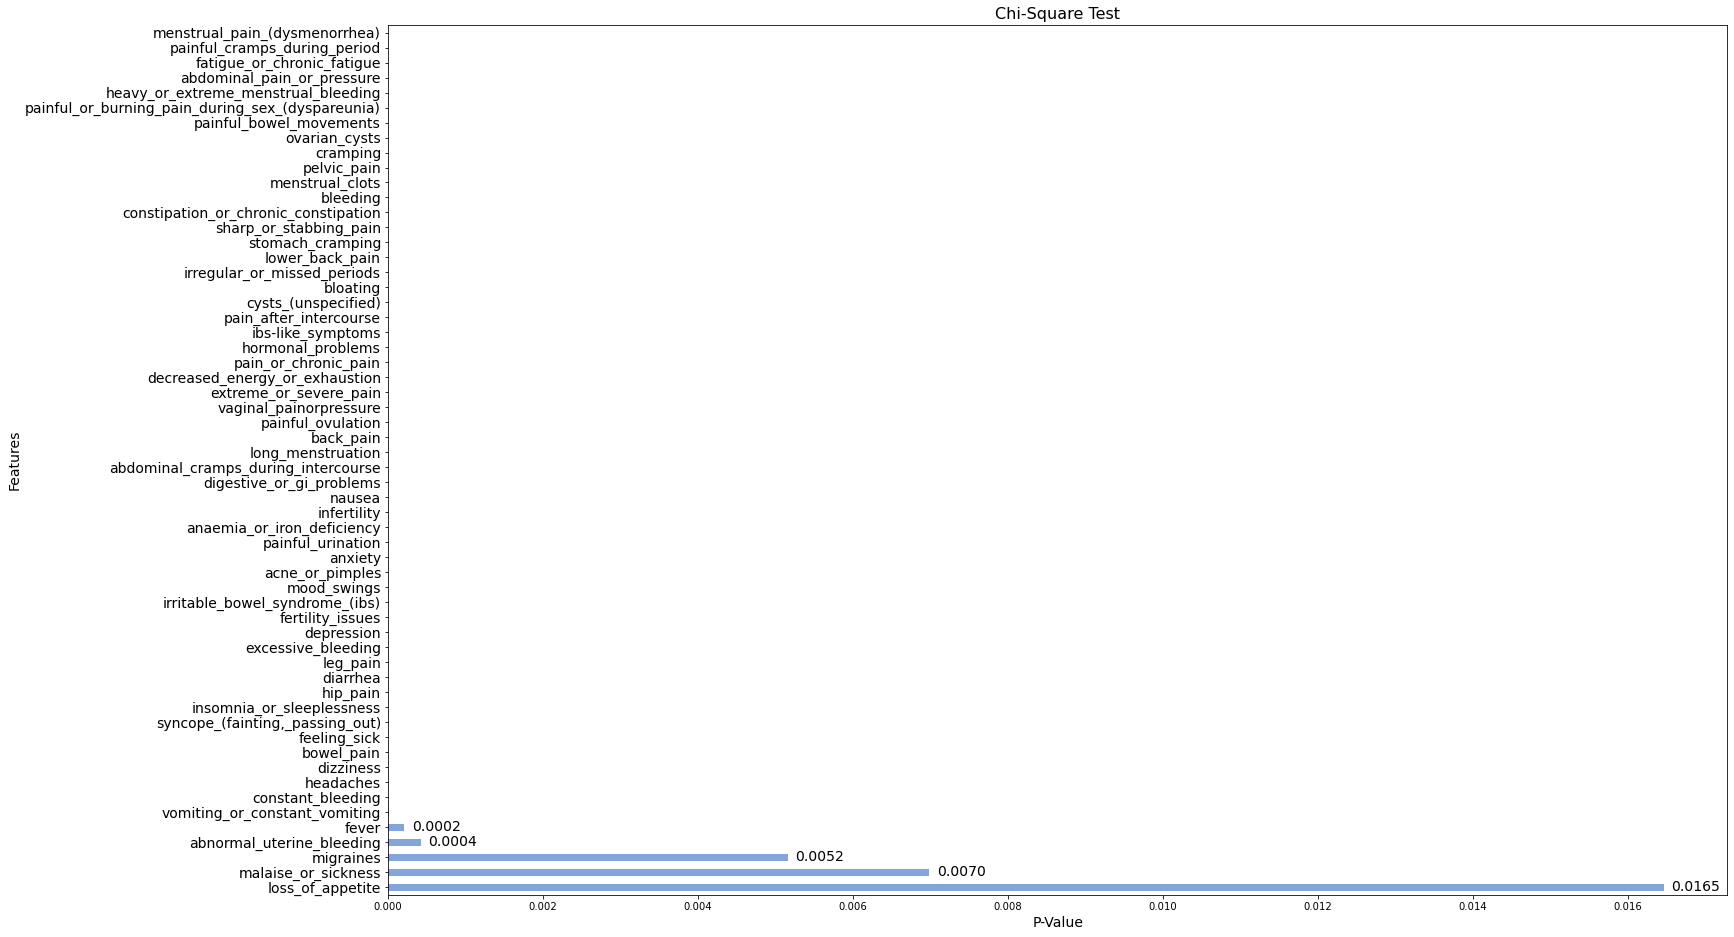

In [18]:
chi_square_test(Xtrain, ytrain)

## Feature Importance 
### General

In [19]:
color = (0.3, # redness
         0.5, # greenness
         0.8, # blueness
         0.7 # transparency
         )  

def feature_importance(Xtrain, ytrain, data):
    
    importances = mutual_info_classif(Xtrain, ytrain)
    feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])

    # Sort the features by importance score in descending order
    sorted_features = sorted(feat_importances.items(), key=lambda x: x[1], reverse=True)

    # Print the feature importance scores and the sorted features
    for feature, score in sorted_features:
        print(feature, ":", score)

    # Plot a horizontal bar chart of the feature importance scores
    fig, ax = plt.subplots(figsize=(24,16))
    y_pos = np.arange(len(sorted_features))
    ax.barh(y_pos, [score for feature, score in sorted_features], align="center", color = color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([feature for feature, score in sorted_features])
    ax.invert_yaxis()  # Labels read top-to-bottom
    ax.set_xlabel("Feature Importance Score", fontsize=12,)
    ax.set_ylabel("Features", fontsize=12)
    ax.set_title("Feature Importance Graph",y=1,size=16)

    # Add importance scores as labels on the horizontal bar chart
    for i, v in enumerate([score for feature, score in sorted_features]):
        ax.text(v + 0.005, i, str(round(v, 2)), color="black", fontsize=12,)
        
    plt.savefig('../images/machine_learning/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    


menstrual_pain_(dysmenorrhea) : 0.2734310888398186
cramping : 0.21595291202119093
painful_cramps_during_period : 0.1958625670379479
heavy_or_extreme_menstrual_bleeding : 0.18178793827127238
fatigue_or_chronic_fatigue : 0.17898900005074392
bleeding : 0.17432053280564697
pelvic_pain : 0.16971913570467345
painful_or_burning_pain_during_sex_(dyspareunia) : 0.1668893339702251
lower_back_pain : 0.15820277298006546
abdominal_pain_or_pressure : 0.14847073560393964
bloating : 0.14058563126572365
menstrual_clots : 0.13588163574682954
painful_bowel_movements : 0.13359846978034473
ovarian_cysts : 0.13352130853973398
stomach_cramping : 0.13246087137040163
cysts_(unspecified) : 0.12693583390214136
back_pain : 0.12334137462879546
constipation_or_chronic_constipation : 0.12289940599445748
pain_after_intercourse : 0.1128022165096283
pain_or_chronic_pain : 0.10915404677647511
painful_ovulation : 0.10849140281549352
sharp_or_stabbing_pain : 0.10471279665960664
nausea : 0.10360024621348507
irregular_or_mi

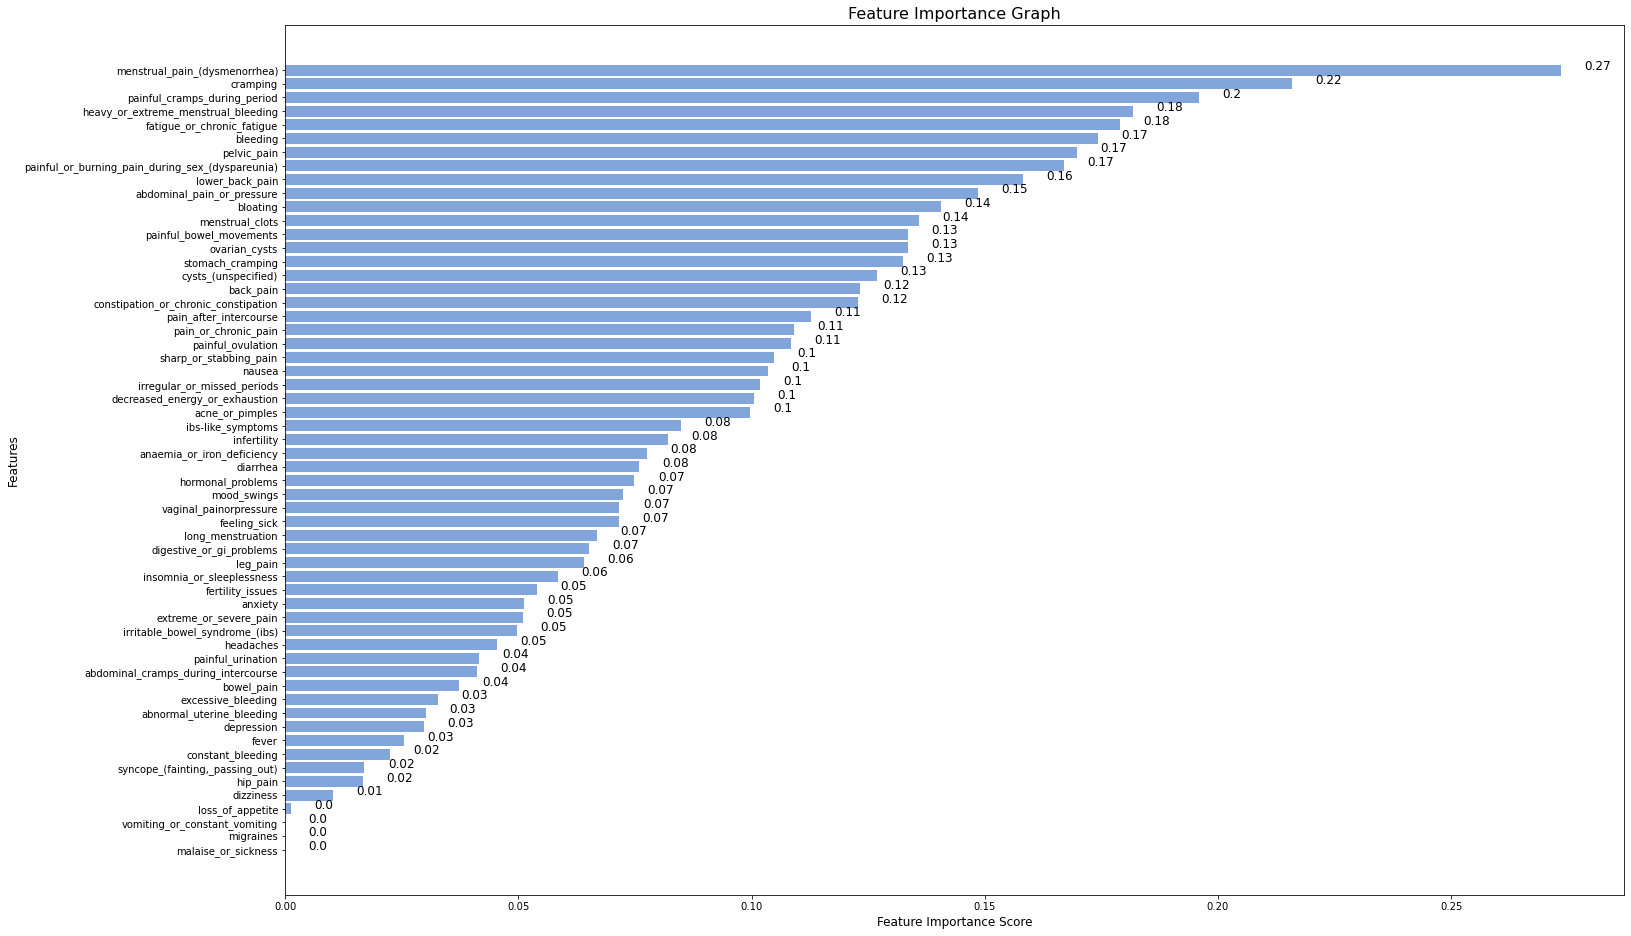

In [20]:
# check the feature importance of the data
feature_importance(Xtrain, ytrain, data)

### Based on ML Models

In [21]:
color = (0.3, # redness
         0.5, # greenness
         0.8, # blueness
         0.7 # transparency
         )  

# for linear models
def feature_importance(model, x_train, y_train):
    # Extract feature names directly from x_train
    feature_names = x_train.columns

    feature_importance = abs(model.coef_[0])
    feature_importance = (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    # Print feature importance values
    print("\nFeature Importance Scores:")
    for i in sorted_idx[::-1]:  # Reverse order for descending values
        print(f"{feature_names[i]}: {feature_importance[i]:.7f}")
    
    featfig = plt.figure(figsize=(24, 16))
    plt.title('Feature Importance',y=1,size=16)

    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center', color = color )
    featax.set_yticks(pos)
    featax.set_xlabel("Feature Importance Score", fontsize=12,)
    featax.set_ylabel("Features", fontsize=12,)
    featax.set_yticklabels(np.array(data.columns)[sorted_idx], fontsize=14)

     # annotate feature importance values on the bars
    for i, v in enumerate(feature_importance[sorted_idx]):
        featax.text(v + 0.02, pos[i], f"{v:.2f}", fontsize=12, verticalalignment='center')
    
    plt.savefig(f'../images/machine_learning/{type(model).__name__}_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()   
    plt.show()


Feature Importance Scores:
fatigue_or_chronic_fatigue: 1.0000000
bowel_pain: 0.9828356
ovarian_cysts: 0.9700149
painful_bowel_movements: 0.9323717
menstrual_pain_(dysmenorrhea): 0.9225409
abnormal_uterine_bleeding: 0.9029831
ibs-like_symptoms: 0.9027853
irregular_or_missed_periods: 0.8877009
bleeding: 0.8867985
fever: 0.8654105
constant_bleeding: 0.8561943
loss_of_appetite: 0.7179457
infertility: 0.6906622
vomiting_or_constant_vomiting: 0.6886067
constipation_or_chronic_constipation: 0.6506497
cysts_(unspecified): 0.6306819
painful_cramps_during_period: 0.6218565
painful_ovulation: 0.5947371
malaise_or_sickness: 0.5626783
fertility_issues: 0.5267989
pelvic_pain: 0.5073180
hormonal_problems: 0.4979814
extreme_or_severe_pain: 0.4958657
cramping: 0.4694941
painful_or_burning_pain_during_sex_(dyspareunia): 0.4435270
abdominal_cramps_during_intercourse: 0.4174945
abdominal_pain_or_pressure: 0.3752799
lower_back_pain: 0.3619349
feeling_sick: 0.3508896
dizziness: 0.3236357
bloating: 0.301178

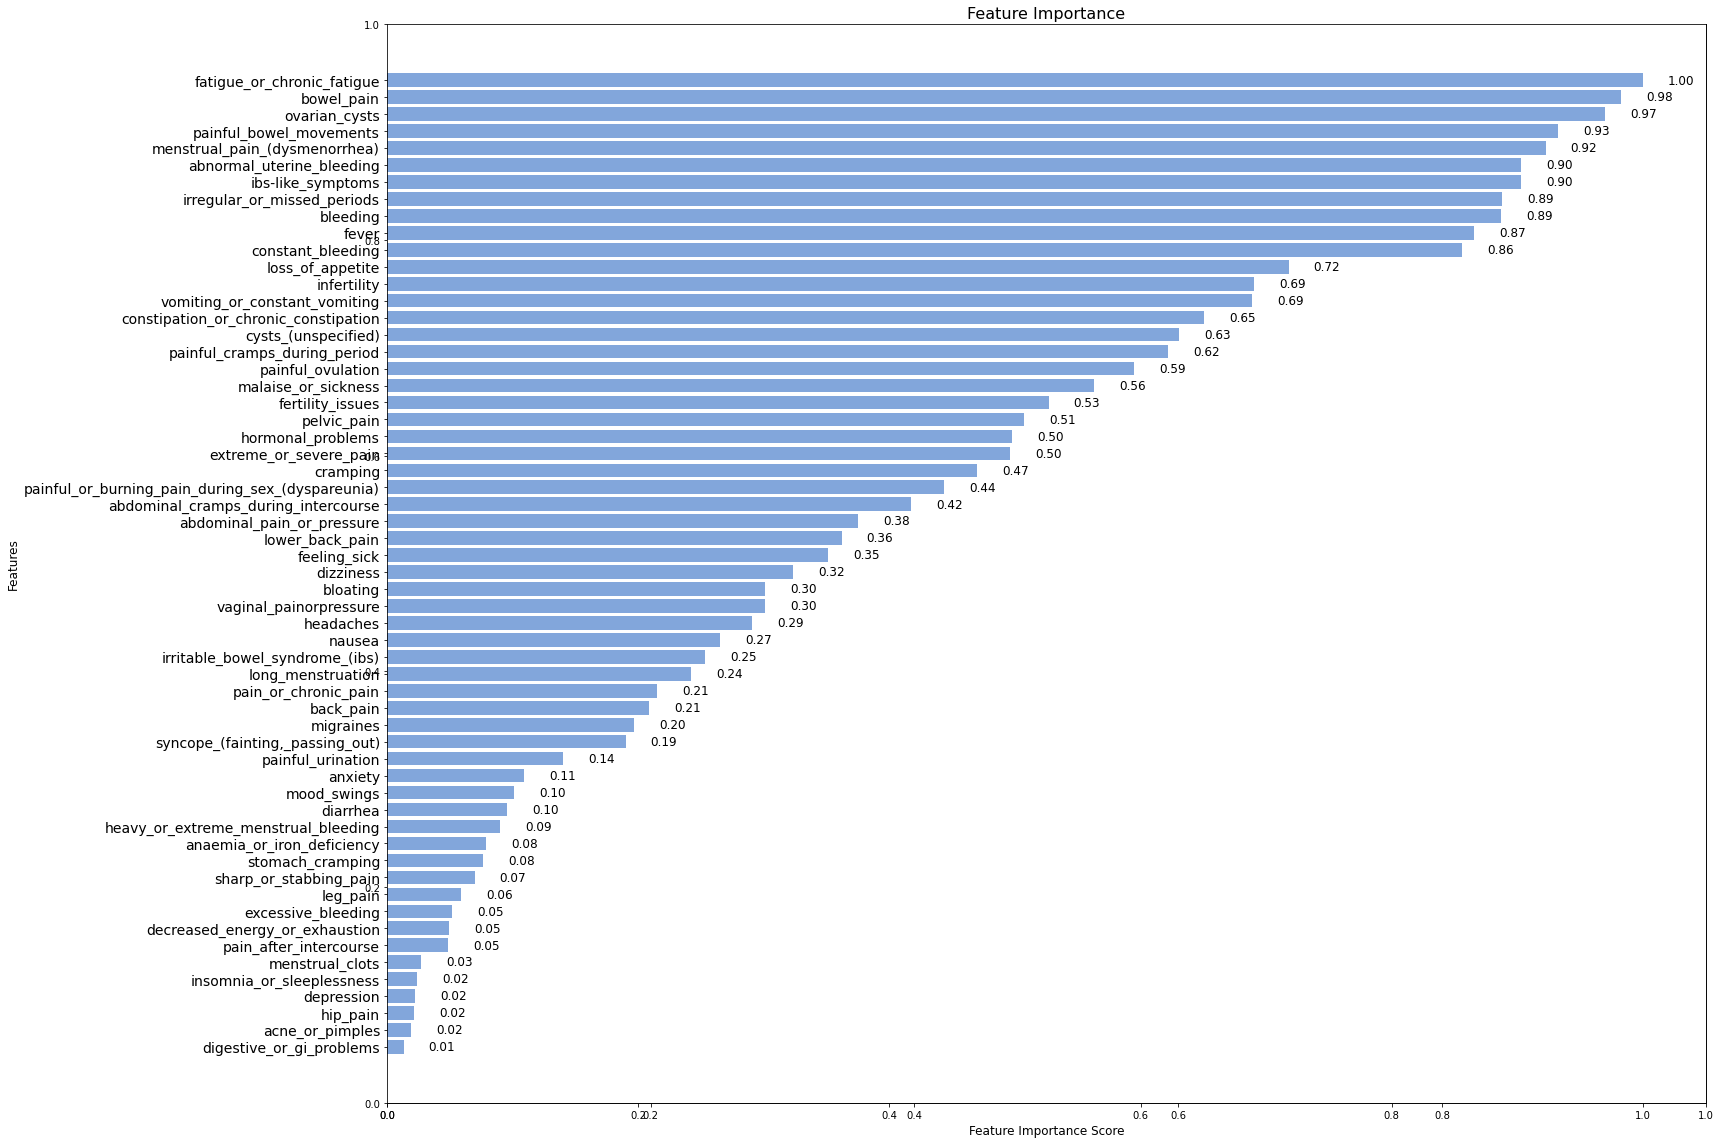

In [22]:
# check the feature importance of the data

logistic_regression_model = LogisticRegression(max_iter = 10000)
logistic_regression_model.fit(Xtrain, ytrain)

feature_importance(logistic_regression_model, Xtrain, ytrain)


Feature Importance Scores:
bowel_pain: 1.0000000
irregular_or_missed_periods: 0.9805764
bleeding: 0.8670973
painful_bowel_movements: 0.8624936
abnormal_uterine_bleeding: 0.8412691
vomiting_or_constant_vomiting: 0.8327693
ibs-like_symptoms: 0.8236966
fatigue_or_chronic_fatigue: 0.8072756
fever: 0.7573479
menstrual_pain_(dysmenorrhea): 0.7360731
fertility_issues: 0.7082135
constipation_or_chronic_constipation: 0.6800127
ovarian_cysts: 0.6193215
constant_bleeding: 0.5864657
painful_ovulation: 0.5594019
cysts_(unspecified): 0.5244044
infertility: 0.5224662
loss_of_appetite: 0.4883843
abdominal_cramps_during_intercourse: 0.4819922
painful_cramps_during_period: 0.4769237
long_menstruation: 0.4331343
extreme_or_severe_pain: 0.4255535
syncope_(fainting,_passing_out): 0.4053921
hormonal_problems: 0.3491851
malaise_or_sickness: 0.3478974
pelvic_pain: 0.3444113
cramping: 0.3381555
painful_or_burning_pain_during_sex_(dyspareunia): 0.3009181
headaches: 0.2865255
dizziness: 0.2738175
abdominal_pain

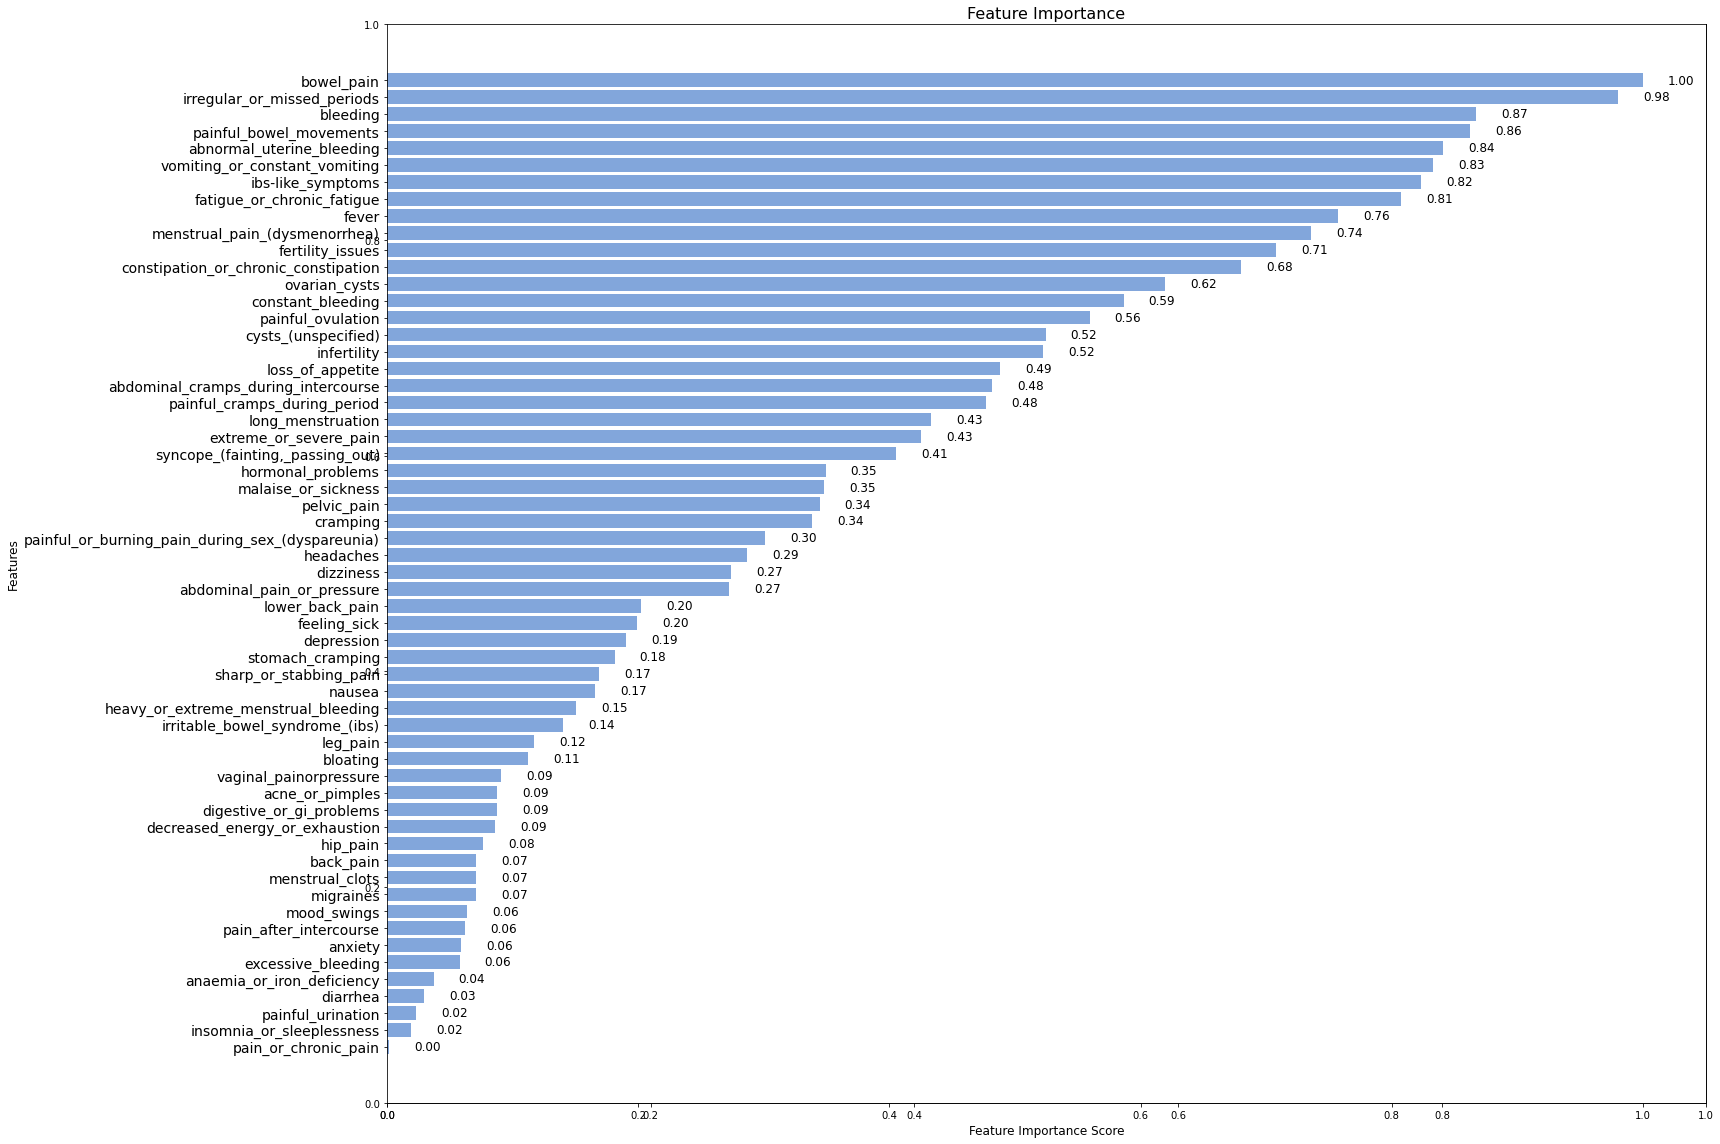

In [23]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Xtrain, ytrain)

feature_importance(svm_model, Xtrain, ytrain)

In [24]:
# adjusted for non linear models
def feature_importance(model, x_train, y_train):
    # Extract feature names directly from x_train
    feature_names = x_train.columns
    
    feature_importance = abs(model.feature_importances_)
    feature_importance = (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Print feature importance values
    print("\nFeature Importance Scores:")
    for i in sorted_idx[::-1]:  # Reverse order for descending values
        print(f"{feature_names[i]}: {feature_importance[i]:.7f}")

    featfig = plt.figure(figsize=(24, 16))
    plt.title('Feature Importance',y=1,size=16)

    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center', color = color )
    featax.set_yticks(pos)
    featax.set_xlabel("Feature Importance Score", fontsize=12,)
    featax.set_ylabel("Features", fontsize=12,)
    featax.set_yticklabels(np.array(data.columns)[sorted_idx], fontsize=14)

     # Annotate feature importance values on the bars
    for i, v in enumerate(feature_importance[sorted_idx]):
        featax.text(v + 0.02, pos[i], f"{v:.2f}", fontsize=12, verticalalignment='center')
    
    plt.savefig(f'../images/machine_learning/{type(model).__name__}_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()   
    plt.show()


Feature Importance Scores:
menstrual_pain_(dysmenorrhea): 1.0000000
fatigue_or_chronic_fatigue: 0.6982886
heavy_or_extreme_menstrual_bleeding: 0.6739421
painful_cramps_during_period: 0.5693323
painful_or_burning_pain_during_sex_(dyspareunia): 0.5310981
cramping: 0.4913648
pelvic_pain: 0.4743832
abdominal_pain_or_pressure: 0.3682021
bleeding: 0.3675866
painful_bowel_movements: 0.3063344
ovarian_cysts: 0.2729045
irregular_or_missed_periods: 0.2624428
back_pain: 0.2499449
bloating: 0.2213295
lower_back_pain: 0.1985566
pain_or_chronic_pain: 0.1751918
infertility: 0.1551409
extreme_or_severe_pain: 0.1495920
cysts_(unspecified): 0.1465883
sharp_or_stabbing_pain: 0.1396094
hormonal_problems: 0.1252010
decreased_energy_or_exhaustion: 0.1070601
constipation_or_chronic_constipation: 0.1042967
menstrual_clots: 0.1038314
stomach_cramping: 0.1019546
painful_ovulation: 0.0970630
nausea: 0.0943924
fever: 0.0918579
abdominal_cramps_during_intercourse: 0.0877908
migraines: 0.0861216
mood_swings: 0.082

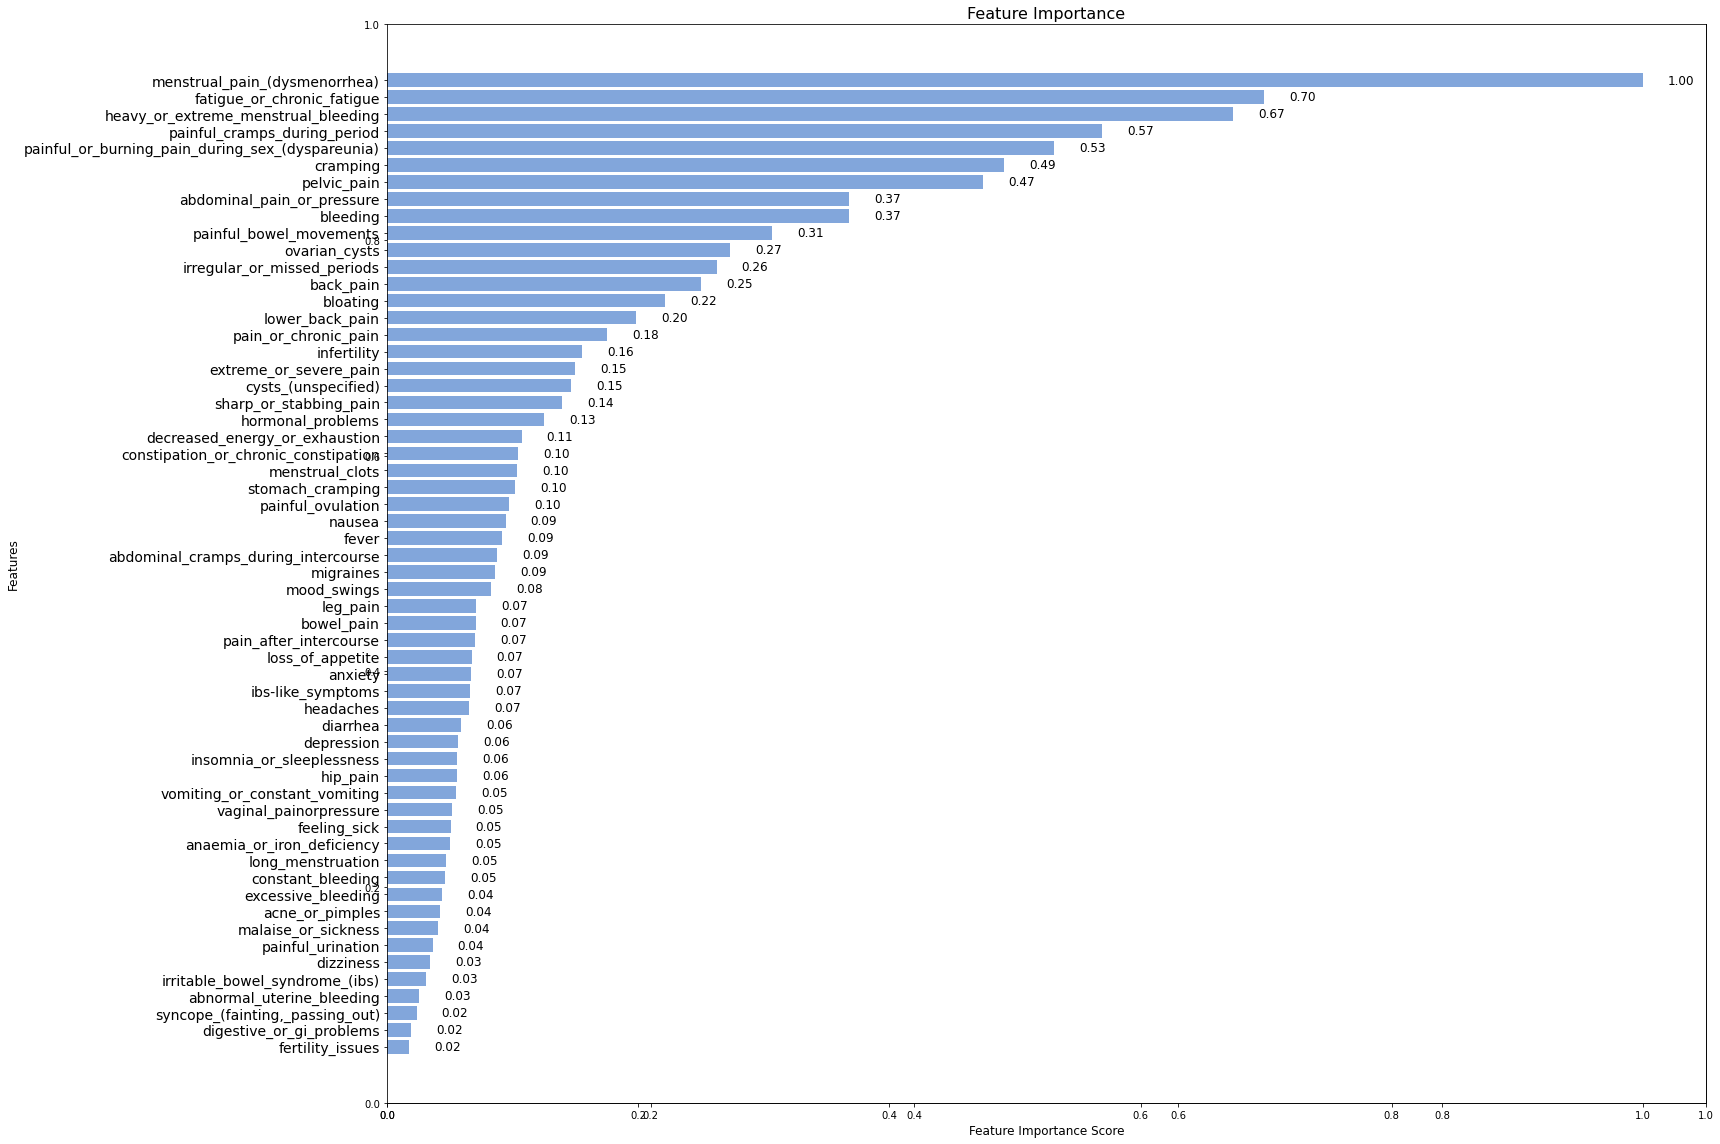

In [25]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(Xtrain, ytrain)

feature_importance(random_forest_model, Xtrain, ytrain)


Feature Importance Scores:
menstrual_pain_(dysmenorrhea): 1.0000000
constant_bleeding: 0.2086513
ovarian_cysts: 0.1804960
painful_cramps_during_period: 0.1477924
fatigue_or_chronic_fatigue: 0.1337823
fever: 0.1038353
painful_or_burning_pain_during_sex_(dyspareunia): 0.0843461
depression: 0.0789369
cysts_(unspecified): 0.0732075
migraines: 0.0694485
ibs-like_symptoms: 0.0693805
irregular_or_missed_periods: 0.0671946
abnormal_uterine_bleeding: 0.0641246
painful_urination: 0.0635190
insomnia_or_sleeplessness: 0.0607555
hormonal_problems: 0.0601682
loss_of_appetite: 0.0590390
long_menstruation: 0.0481936
bloating: 0.0473643
bowel_pain: 0.0457819
bleeding: 0.0452810
extreme_or_severe_pain: 0.0415872
pelvic_pain: 0.0409459
abdominal_pain_or_pressure: 0.0404815
painful_bowel_movements: 0.0390457
headaches: 0.0381327
cramping: 0.0377511
infertility: 0.0370713
painful_ovulation: 0.0367728
pain_after_intercourse: 0.0367499
vaginal_painorpressure: 0.0365627
anaemia_or_iron_deficiency: 0.0352935


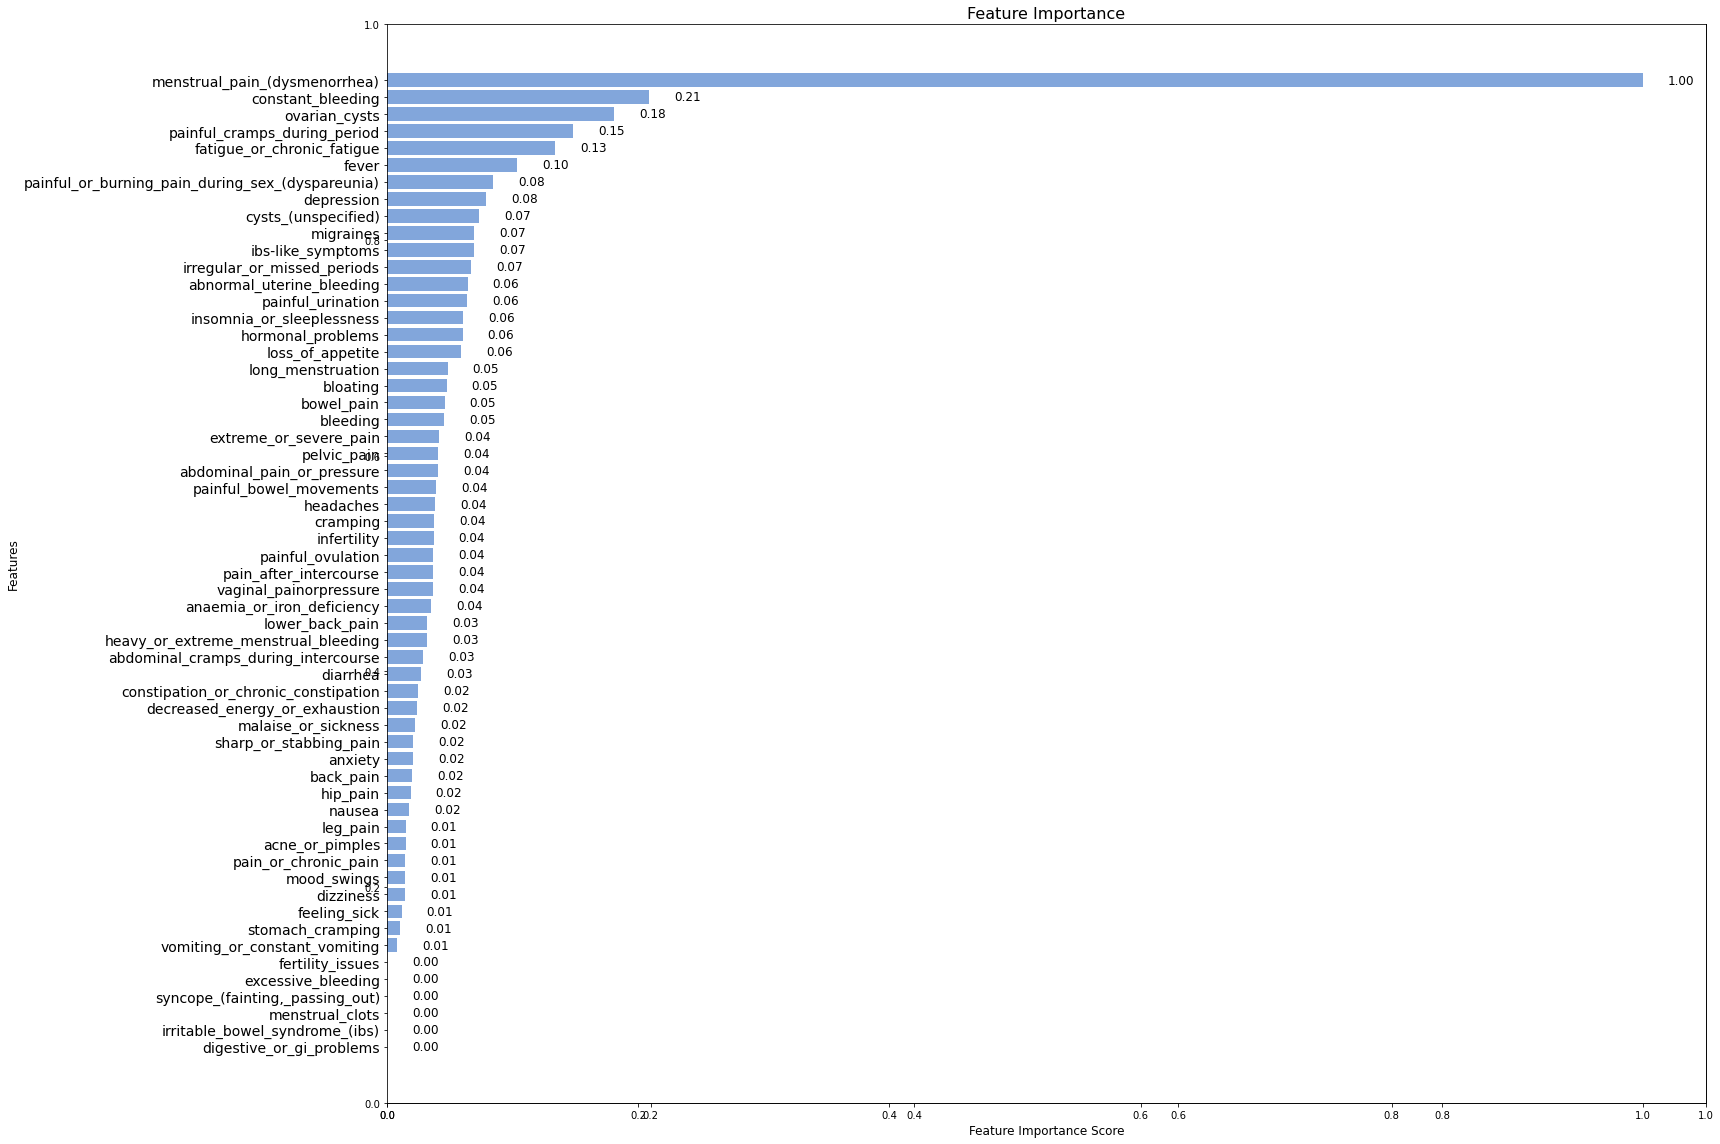

In [26]:
xgboost_model = XGBClassifier()
xgboost_model.fit(Xtrain, ytrain)

feature_importance(xgboost_model, Xtrain, ytrain)


Feature Importance Scores:
menstrual_pain_(dysmenorrhea): 1.0000000
fatigue_or_chronic_fatigue: 0.1567757
back_pain: 0.0887676
painful_or_burning_pain_during_sex_(dyspareunia): 0.0791351
painful_cramps_during_period: 0.0573052
pelvic_pain: 0.0563577
abdominal_pain_or_pressure: 0.0485165
bleeding: 0.0397677
irregular_or_missed_periods: 0.0386634
ovarian_cysts: 0.0351200
bloating: 0.0340752
migraines: 0.0327446
extreme_or_severe_pain: 0.0314655
cramping: 0.0293621
hormonal_problems: 0.0288264
vomiting_or_constant_vomiting: 0.0264474
constant_bleeding: 0.0235335
infertility: 0.0223743
headaches: 0.0214845
mood_swings: 0.0214099
depression: 0.0208877
fever: 0.0157060
painful_bowel_movements: 0.0150832
ibs-like_symptoms: 0.0149050
anaemia_or_iron_deficiency: 0.0147379
abdominal_cramps_during_intercourse: 0.0123404
painful_urination: 0.0113933
dizziness: 0.0111580
pain_or_chronic_pain: 0.0105848
abnormal_uterine_bleeding: 0.0105652
malaise_or_sickness: 0.0100858
cysts_(unspecified): 0.00962

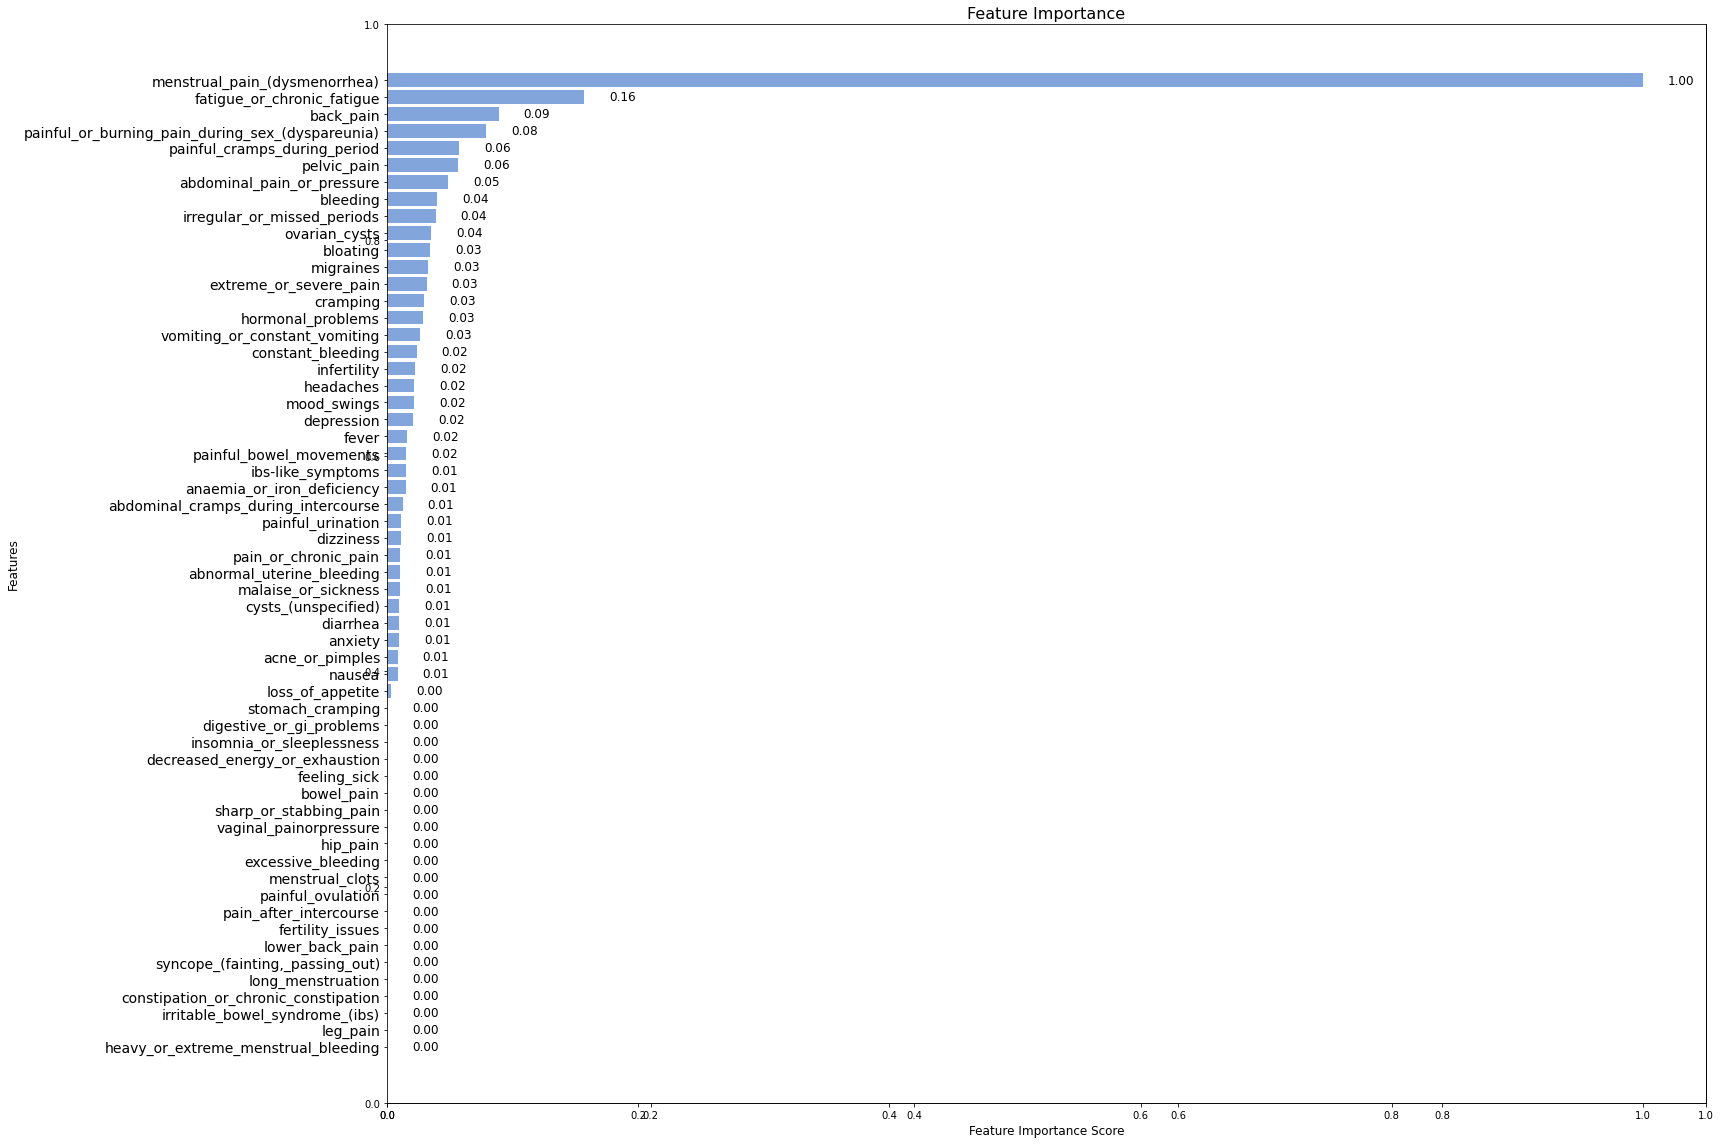

In [27]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(Xtrain, ytrain)

feature_importance(decision_tree_model, Xtrain, ytrain)


Feature Importance Scores:
irregular_or_missed_periods: 1.0000000
loss_of_appetite: 0.6666667
bowel_pain: 0.6666667
menstrual_pain_(dysmenorrhea): 0.6666667
cramping: 0.6666667
painful_bowel_movements: 0.6666667
constipation_or_chronic_constipation: 0.6666667
fatigue_or_chronic_fatigue: 0.6666667
painful_ovulation: 0.6666667
ovarian_cysts: 0.6666667
constant_bleeding: 0.6666667
ibs-like_symptoms: 0.6666667
bleeding: 0.6666667
abnormal_uterine_bleeding: 0.6666667
extreme_or_severe_pain: 0.3333333
feeling_sick: 0.3333333
hormonal_problems: 0.3333333
fever: 0.3333333
cysts_(unspecified): 0.3333333
pain_or_chronic_pain: 0.3333333
painful_cramps_during_period: 0.3333333
infertility: 0.3333333
mood_swings: 0.3333333
lower_back_pain: 0.3333333
bloating: 0.3333333
fertility_issues: 0.3333333
headaches: 0.3333333
malaise_or_sickness: 0.3333333
back_pain: 0.3333333
abdominal_pain_or_pressure: 0.3333333
abdominal_cramps_during_intercourse: 0.3333333
pelvic_pain: 0.3333333
painful_or_burning_pain

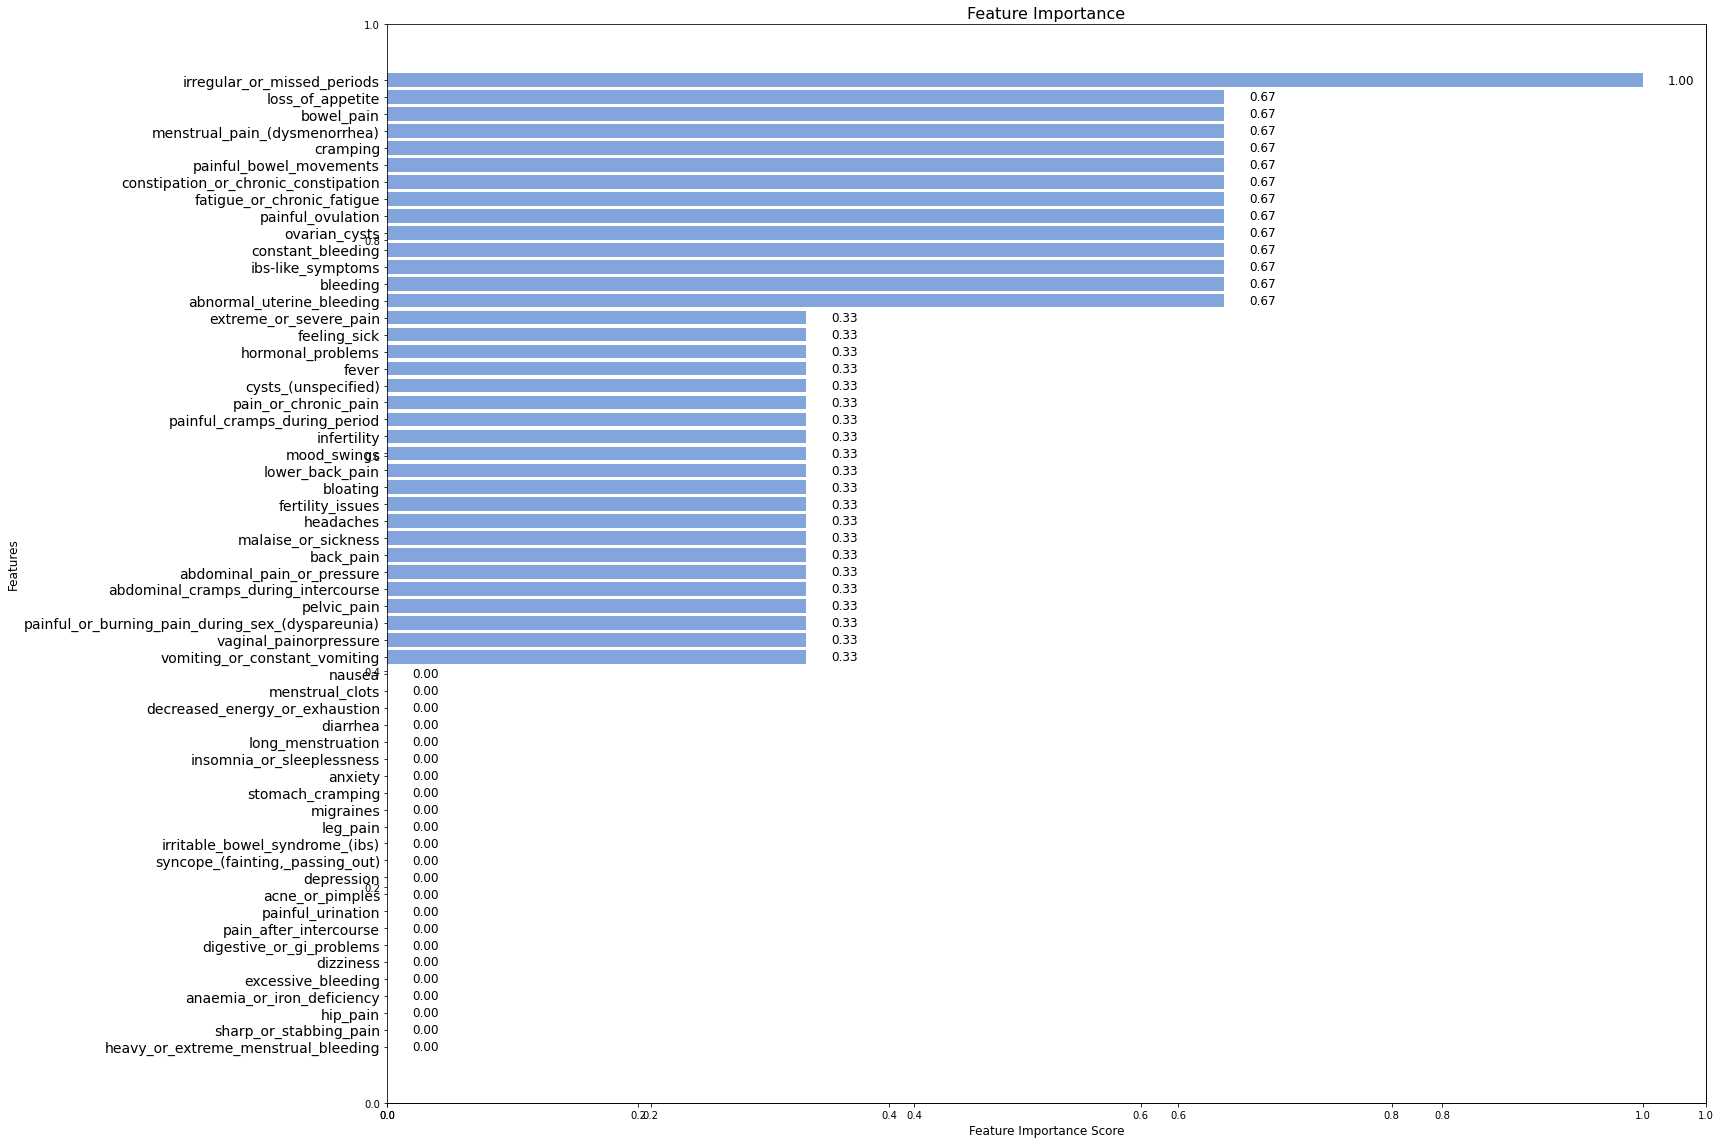

In [28]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(Xtrain, ytrain)

feature_importance(adaboost_model, Xtrain, ytrain)